## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
singledata=pd.merge(study_results, mouse_metadata, how="left") 

singledata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice in the DataFrame.
numbermice=len(singledata["Mouse ID"].unique())

print(f"Number of mice in the DataFrame: {numbermice}")

Number of mice in the DataFrame: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = singledata[singledata.duplicated(["Mouse ID", "Timepoint"])]
onlydupes = duplicates[["Mouse ID"]]
onlydupes

,Mouse ID
137,g989
360,g989
681,g989
869,g989
1111,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#this shows that the g989 mouse has the same mouse IDs at the same tinepoints 
singledata[singledata["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#exclamation means everything but and removes the g989 mouse 
cleandata = singledata[singledata["Mouse ID"] != "g989"]
cleandata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
#one less mice shows that it was cleaned 
numbermice=len(cleandata["Mouse ID"].unique())

print(f"Number of mice in the DataFrame: {numbermice}")

Number of mice in the DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

tumordata = cleandata.groupby(["Drug Regimen"])
mean = tumordata.mean()["Tumor Volume (mm3)"]
median = tumordata.median()["Tumor Volume (mm3)"]
variance = tumordata.var()["Tumor Volume (mm3)"]
standarddeviation = tumordata.std()["Tumor Volume (mm3)"]
SEM = tumordata.sem()["Tumor Volume (mm3)"]

summary = pd.DataFrame({"Mean":mean, "Median":median,"Variance":variance,"Standard Deviation":standarddeviation,"SEM":SEM})
summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
#by using the .agg aggregation function, it gives us all the information we need in one table
tumordatasingle = cleandata.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumordatasingle

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


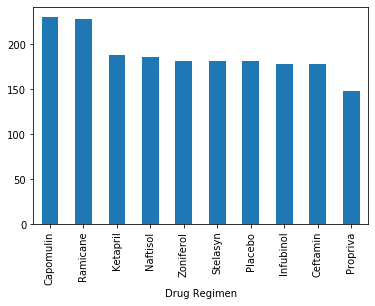

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
pandasbarplot = cleandata.groupby(["Drug Regimen"])["Timepoint"].count()
#plot using pandas (.plot.bar)
print(pandasbarplot)
pandasbarplot.sort_values(ascending=False).plot.bar()  

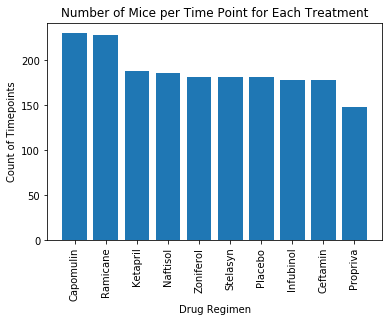

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
pyplotbarplot = pandasbarplot.sort_values(ascending=False)
#plot using pyplot (plt.xxxxxx)
plt.bar(pyplotbarplot.index, pyplotbarplot.values)
plt.ylabel("Count of Timepoints")
plt.xlabel("Drug Regimen") 
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Time Point for Each Treatment")
plt.show()

## Pie Plots

Sex
Female    922
Male      958
Name: Sex, dtype: int64


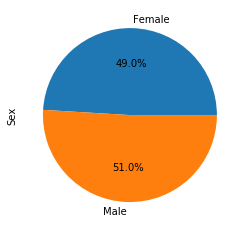

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexdistribution = cleandata.groupby(["Sex"])["Sex"].count()

# plotted chart using pandas .plot.pie() with customizations
print(sexdistribution)
sexdistribution.plot.pie(autopct="%1.1f%%")


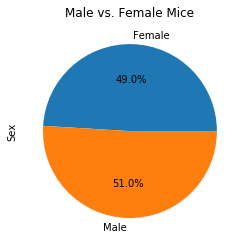

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sexdistribution, labels=("Female", "Male"), autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
finaltumorvolume= cleandata.groupby(['Mouse ID'])['Timepoint'].max()
finaltumorvolume = pd.DataFrame(finaltumorvolume)
finaltumorvolumedf = pd.merge(cleandata, finaltumorvolume, on=('Mouse ID', 'Timepoint'))
#found that the max timepoint is 45 so set the data for timepoint = 45 
drugdata = finaltumorvolumedf.loc[(finaltumorvolumedf["Timepoint"] == 45)]

#print the information by the top four drugs, Capomulin, Ramicane, Infubinol, and Ceftamin
volume = drugdata.loc[(drugdata["Drug Regimen"] == "Capomulin")]
tumorvolume = volume["Tumor Volume (mm3)"]
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f'The Capomulin drug volume calcuations')
print(f"The lower quartile of Capomulin drug tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin drug tumor volume is: {upperq}")
print(f"The interquartile range Capomulin drug tumor volume is: {iqr}")
print(f"The the median of Capomulin drug tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")

print('--------------------------------------------------------')

volume = drugdata.loc[(drugdata["Drug Regimen"] == "Ramicane")]
tumorvolume = volume["Tumor Volume (mm3)"]
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The Ramicane drug volume calcuations')
print(f"The lower quartile of Ramicane drug tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane drug tumor volume is: {upperq}")
print(f"The interquartile range Ramicane drug tumor volume is: {iqr}")
print(f"The the median of Ramicane drug tumor volume is: {round(quartiles[0.5],1)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")

print('--------------------------------------------------------')
volume = drugdata.loc[(drugdata["Drug Regimen"] == "Infubinol")]
tumorvolume = volume["Tumor Volume (mm3)"]
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The Infubinol drug volume calcuations')
print(f"The lower quartile of Infubinol drug tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol drug tumor volume is: {upperq}")
print(f"The interquartile range Infubinol drug tumor volume is: {iqr}")
print(f"The the median of Infubinol drug tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")

print('--------------------------------------------------------')

volume = drugdata.loc[(drugdata["Drug Regimen"] == "Ceftamin")]
tumorvolume = volume["Tumor Volume (mm3)"]
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The Ceftamin drug volume calcuations')
print(f"The lower quartile of Ceftamin drug tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin drug tumor volume is: {upperq}")
print(f"The interquartile range Ceftamin drug tumor volume is: {iqr}")
print(f"The the median of Ceftamin drug tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} may be outliers.")
print(f"Values above {upper_bound} may be outliers.")

print('--------------------------------------------------------')

The Capomulin drug volume calcuations
The lower quartile of Capomulin drug tumor volume is: 32.37735684
The upper quartile of Capomulin drug tumor volume is: 40.1592203
The interquartile range Capomulin drug tumor volume is: 7.781863460000004
The the median of Capomulin drug tumor volume is: 37.31184577 
Values below 20.70456164999999 may be outliers.
Values above 51.83201549 may be outliers.
--------------------------------------------------------
The Ramicane drug volume calcuations
The lower quartile of Ramicane drug tumor volume is: 30.981175224999998
The upper quartile of Ramicane drug tumor volume is: 38.508305307499995
The interquartile range Ramicane drug tumor volume is: 7.527130082499998
The the median of Ramicane drug tumor volume is: 34.8 
Values below 19.690480101250003 may be outliers.
Values above 49.79900043124999 may be outliers.
--------------------------------------------------------
The Infubinol drug volume calcuations
The lower quartile of Infubinol drug tumor vol

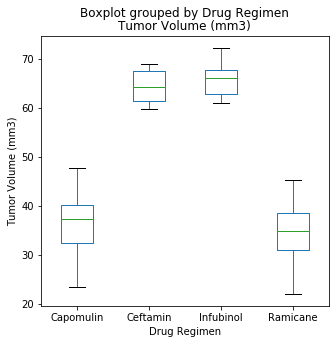

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplotdata = cleandata.loc[(cleandata["Drug Regimen"] == "Capomulin") | (cleandata["Drug Regimen"] == "Ramicane") |(cleandata["Drug Regimen"] == "Infubinol") | (cleandata["Drug Regimen"] == "Ceftamin")]

boxplotdata = boxplotdata.loc[(boxplotdata["Timepoint"] == 45)]

#Drug and final tumor volume box plot without gridline 
boxplotdata.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)", grid = False, figsize = (5,5))

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse U364')

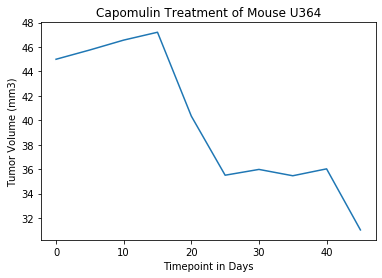

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#looking at the data frame at the very top, there is a mouse u364 that has Capomulin as the treatment so I identify just the data for that one mouse 
mouseu364 = cleandata.loc[cleandata["Mouse ID"] == "u364"]

plt.plot(mouseu364["Timepoint"], mouseu364["Tumor Volume (mm3)"])
plt.xlabel("Timepoint in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse U364")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

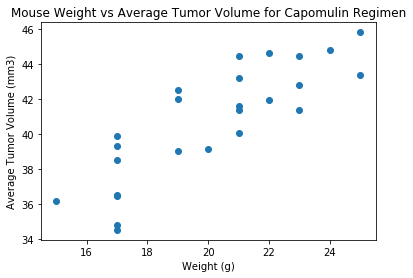

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weightforcap = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin"]
capavg = weightforcap.groupby(["Mouse ID"]).mean()
x = capavg["Weight (g)"]
y = capavg["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient is: 0.84
The linear regression model equation is: y = 0.95x + 21.55


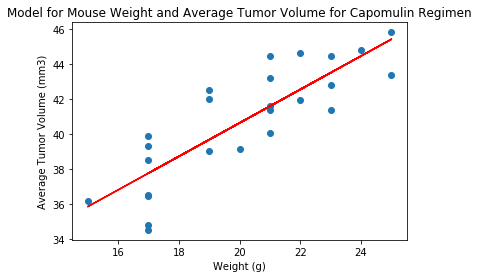

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#set the values as variables 
x = capavg["Weight (g)"]
y = capavg["Tumor Volume (mm3)"]
#get the linear regression information using scipy.stats as st.linregress to get all the information needed 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regressvalues = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation coefficient is: {round(rvalue,2)}")
print(f"The linear regression model equation is: {line}")
plt.scatter(x, y)
plt.plot(x,regressvalues,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Model for Mouse Weight and Average Tumor Volume for Capomulin Regimen")
plt.show()
